In [ ]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv('salary_prediction_dataset.csv')
df

,Age,Experience_years,Education_level,Tech_Skills,Soft_Skills,Salary_USD
0,59,2,1,4,4,29431.0
1,49,5,3,1,9,42375.0
2,35,7,2,5,2,36989.0
3,28,26,4,7,9,90795.0
4,41,8,3,6,1,45132.0
...,...,...,...,...,...,...
145,59,26,2,5,5,75102.0
146,53,1,2,5,6,30596.0
147,21,25,4,4,1,79236.0
148,47,16,1,3,5,47831.0


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
X = df.drop('Salary_USD', axis=1)
y = df['Salary_USD']

In [ ]:

numeric_features = ["Age", "Experience_years"]
categorical_features = ["Education_level", "Tech_Skills", "Soft_Skills"]

In [ ]:

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [ ]:
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:

model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [ ]:
# Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Mean Squared Error:", mse)
print("R² Score:", r2)

Mean Squared Error: 22778091.498458464
R² Score: 0.9080082295134104


Text(0.5, 1.0, 'Actual vs Predicted Salary')

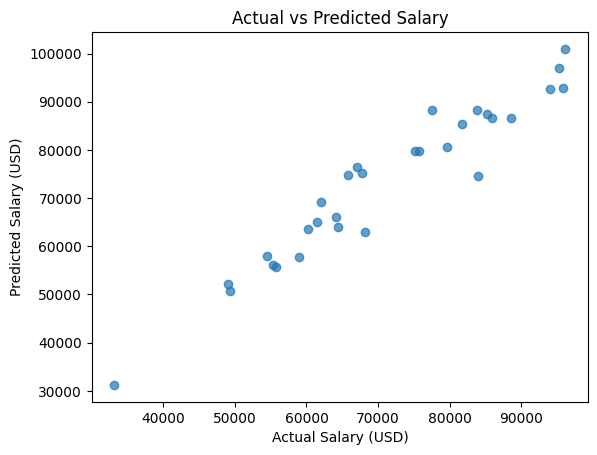

In [32]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Salary (USD)")
plt.ylabel("Predicted Salary (USD)")
plt.title("Actual vs Predicted Salary")